# News Title Classification

## Importing The Libraries

In [6]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [7]:
#Importing dataset
comment_spam = pd.read_excel('drive/My Drive/Comment Spam.xls')
comment_spam.head()

,No,Comment,Class
0,1,this song is racist,0
1,2,and how many subscribers compared to her over ...,1
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,4,well done shakira,0
4,5,:D subscribe to me for daily vines,1


# Exploratory Data Analysis

In [8]:
#Checking Missing Values
comment_spam.isnull().sum()

No         0
Comment    0
Class      0
dtype: int64

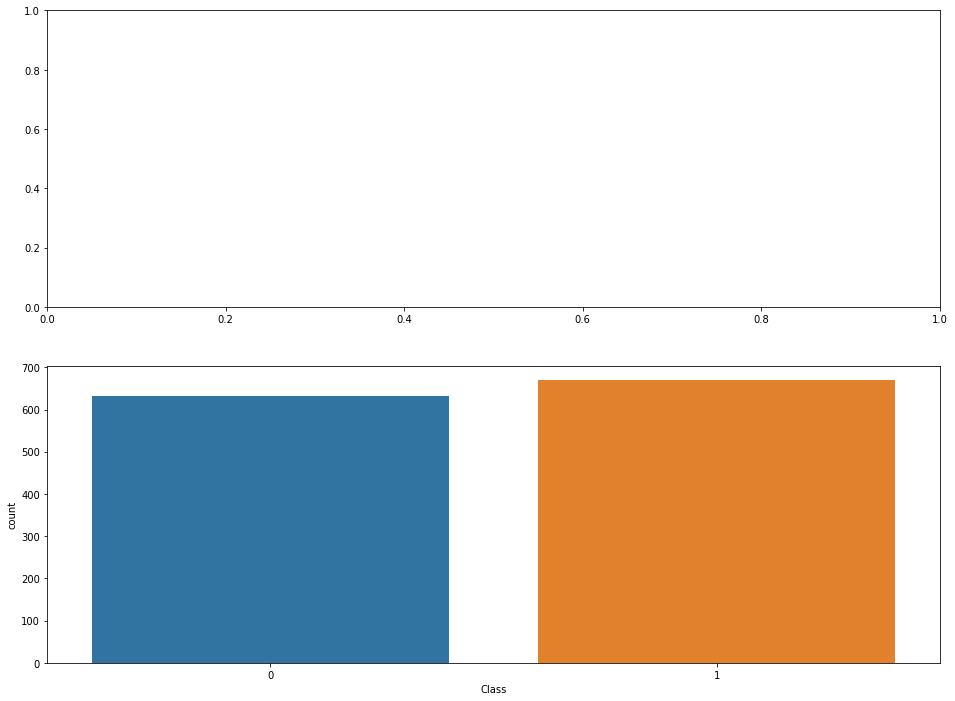

In [9]:
#Plotting graph for category column
fig, axs = plt.subplots(2, 1, figsize=(16,12))
sns.countplot(x='Class', data=comment_spam, ax=axs[1])

## Cleaning The Texts

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [11]:
print(comment_spam['Comment'])

0                                     this song is racist
1       and how many subscribers compared to her over ...
2       HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...
3                                       well done shakira
4                      :D subscribe to me for daily vines
                              ...                        
1295                                        Awsome<br />﻿
1296                  https://www.tsu.co/KodysMan plz ^^﻿
1297    Sign up for free on TSU and start making money...
1298    MEGAN FOX AND EMINEM TOGETHER IN A VIDEO  DOES...
1299                                Great.This is a song﻿
Name: Comment, Length: 1300, dtype: object


In [12]:
#Lowering letters from the comment
comment_spam['Comment_Parsed_1'] = comment_spam['Comment'].str.lower()

In [13]:
#Removing punctuation
punctuation_signs = list('?:!.,;')
comment_spam['Comment_Parsed_2'] = comment_spam['Comment_Parsed_1']

for punct_sign in punctuation_signs:
    comment_spam['Comment_Parsed_2'] = comment_spam['Comment_Parsed_2'].str.replace(punct_sign, '')

In [14]:
#Removing 's
comment_spam['Comment_Parsed_3'] = comment_spam['Comment_Parsed_2'].str.replace("'s", "")

In [15]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
nrows = len(comment_spam)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = comment_spam.loc[row]['Comment_Parsed_3']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts    
    lemmatized_text_list.append(lemmatized_text)

In [18]:
comment_spam['Comment_Parsed_4'] = lemmatized_text_list

In [19]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))


In [21]:
example = "me eating a meal"
word = "me"

# The regular expression is:
regex = r"\b" + word + r"\b"

re.sub(regex, "StopWord", example)

'StopWord eating a meal'

In [22]:
#Removing stopwords from the comment
comment_spam['Comment_Parsed_5'] = comment_spam['Comment_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    comment_spam['Comment_Parsed_5'] = comment_spam['Comment_Parsed_4'].str.replace(regex_stopword, '')

In [23]:
comment_spam.head(1)

,No,Comment,Class,Comment_Parsed_1,Comment_Parsed_2,Comment_Parsed_3,Comment_Parsed_4,Comment_Parsed_5
0,1,this song is racist,0,this song is racist,this song is racist,this song is racist,this song be racist,this song be racist


In [24]:
list_columns = ['Comment', 'Class', 'Comment_Parsed_5']
comment_spam = comment_spam[list_columns]

comment_spam = comment_spam.rename(columns={'Comment_Parsed_5': 'comment_parsed'})

In [25]:
comment_spam.head()

,Comment,Class,comment_parsed
0,this song is racist,0,this song be racist
1,and how many subscribers compared to her over ...,1,and how many subscribers compare to her over a...
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1,hi check out our awesome cover and say what yo...
3,well done shakira,0,well do shakira
4,:D subscribe to me for daily vines,1,d subscribe to me for daily vines


In [26]:
comment_spam['Class'].value_counts()

1    669
0    631
Name: Class, dtype: int64

## Splitting The Dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(comment_spam['comment_parsed'], 
                                                    comment_spam['Class'], 
                                                    test_size=0.2, 
                                                    random_state=0)

In [28]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [29]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


(1040, 300)
(260, 300)


# Building Machine Learning Model

# Naive Bayes

## Training Naive Bayes Model on Training Set Data

In [30]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting The Test Result

In [31]:
labels_pred = classifier.predict(features_test)
labels_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

## Evaluation Metrics

In [32]:
#Test accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("The test accuracy is: ")
print(accuracy_score(labels_test, labels_pred))

The test accuracy is: 
0.8961538461538462


In [33]:
#Classification Report
print('Classification Report')
print(classification_report(labels_test, labels_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       136
           1       0.95      0.82      0.88       124

    accuracy                           0.90       260
   macro avg       0.90      0.89      0.89       260
weighted avg       0.90      0.90      0.90       260



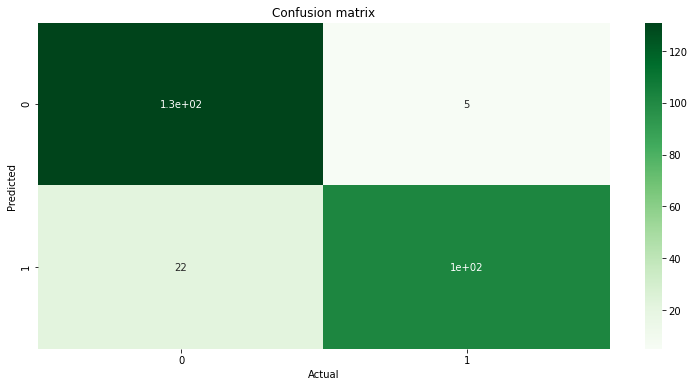

In [34]:
#Confusion Matrix Visualization
aux_comment_spam = comment_spam[['Class']].drop_duplicates().sort_values('Class')
cm = confusion_matrix(labels_test, labels_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm, 
            annot=True,
            xticklabels=aux_comment_spam['Class'].values, 
            yticklabels=aux_comment_spam['Class'].values,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Valiidation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = features_train, y = labels_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.37 %
Standard Deviation: 2.70 %


# Decision Tree

## Training Decision Tree Model on Training Set Data

In [36]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
decision_tree_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_class.fit(features_train, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting The Test Result

In [37]:
labels_pred_decisiontree = decision_tree_class.predict(features_test)
labels_pred_decisiontree

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

##Evaluation metrics

In [38]:
#Test Accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, labels_pred_decisiontree))

The test accuracy is: 
0.9192307692307692


In [39]:
#Classification Report
print('Classification Report')
print(classification_report(labels_test, labels_pred_decisiontree))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       136
           1       0.93      0.90      0.91       124

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



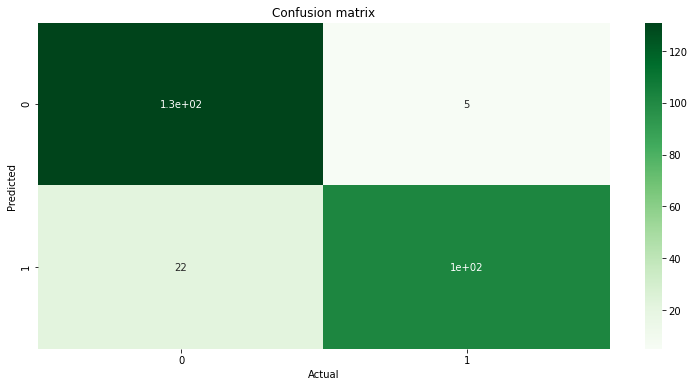

In [40]:
#Confusion Matrix Visualization
aux_comment_spam = comment_spam[['Class']].drop_duplicates().sort_values('Class')
cm_dectree = confusion_matrix(labels_test, labels_pred_decisiontree)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm, 
            annot=True,
            xticklabels=aux_comment_spam['Class'].values, 
            yticklabels=aux_comment_spam['Class'].values,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decision_tree_class, X = features_train, y = labels_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.60 %
Standard Deviation: 3.13 %


# Random Forest

## Training Random Forest Model on Training Set Data

In [42]:
#Random Forest Classsifier
from sklearn.ensemble import RandomForestClassifier
random_forest_class = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_class.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting The Test Result

In [43]:
labels_pred_rdf = random_forest_class.predict(features_test)
labels_pred_rdf

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

## Evaluation Metrics

In [44]:
#Test Accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, labels_pred_rdf))

The test accuracy is: 
0.95


In [45]:
#Classification Report
print('Classification Report')
print(classification_report(labels_test, labels_pred_decisiontree))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       136
           1       0.93      0.90      0.91       124

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



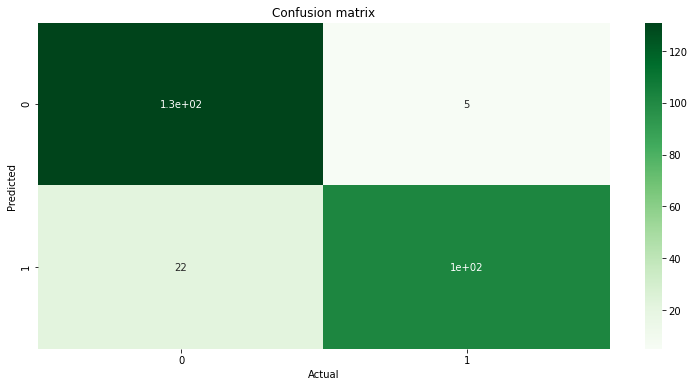

In [46]:
#Confusion Matrix Visualization
aux_comment_spam = comment_spam[['Class']].drop_duplicates().sort_values('Class')
cm_rdf = confusion_matrix(labels_test, labels_pred_rdf)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm, 
            annot=True,
            xticklabels=aux_comment_spam['Class'].values, 
            yticklabels=aux_comment_spam['Class'].values,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_forest_class, X = features_train, y = labels_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.42 %
Standard Deviation: 2.78 %


# Logistic Regression

## Training Logistic Regression Model on Training Set Data

In [48]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict The Test Result

In [49]:
labels_pred_log = log_reg.predict(features_test)
labels_pred_log

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

##Evaluation Metrics

In [50]:
# Test accuracy
print("The test accuracy is: ")
accuracy_score(labels_test, labels_pred_log)

The test accuracy is: 


0.9307692307692308

In [51]:
#Classification Report
print('Classification Report')
print(classification_report(labels_test, labels_pred_log))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       136
           1       0.96      0.90      0.93       124

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260



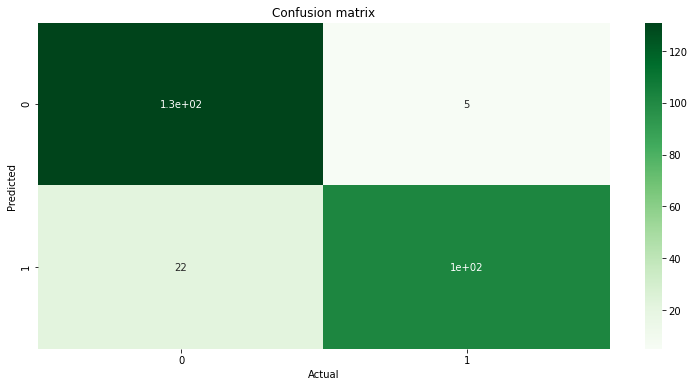

In [52]:
#Confusion Matrix Visualization
aux_comment_spam = comment_spam[['Class']].drop_duplicates().sort_values('Class')
cm_log = confusion_matrix(labels_test, labels_pred_log)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm, 
            annot=True,
            xticklabels=aux_comment_spam['Class'].values, 
            yticklabels=aux_comment_spam['Class'].values,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = features_train, y = labels_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.23 %
Standard Deviation: 2.36 %
